# Example 03-33



$$\max Z = 5x1 + 4x2$$

\begin{align*}
6x_1 + 4x_2 & \leq 24 \\
x_1 + 2x_2 & \leq 6 \\
-x_1 + x_2 & \leq 1\\
x_2 & \leq 2\\[5mm]
x_1, x_2 & \geq 0
\end{align*}


In [12]:
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt

In [16]:
%run "analytical_method.ipynb"
%run "simplex_algorithm.ipynb"

In [18]:
cj = np.array([5, 4, 0, 0, 0, 0], dtype=float)

A =  np.array([
    [ 6, 4, 1, 0, 0, 0],
    [ 1, 2, 0, 1, 0, 0],
    [-1, 1, 0, 0, 1, 0],
    [ 0, 1, 0, 0, 0, 1],
    ], dtype=float)

b = np.array([24, 6, 1, 2], dtype=float)

In [19]:
feasibles, infeasibles, best_vector = analytical(matrix=A, rhs=b, objcoef=cj)
allpoints = sorted(feasibles[:, :2], key=lambda t:t[0], reverse=True)
coordinates = [*zip(*points)]

Singular Matrix with variables (0, 2, 3, 4)


In [20]:
solutions, zvalues = simplex(matrix=A, rhs=b, z=cj, numxvars=2)

Iteration 1
[[ 1.          0.66666667  0.16666667  0.          0.          0.        ]
 [ 0.          1.33333333 -0.16666667  1.          0.          0.        ]
 [ 0.          1.66666667  0.16666667  0.          1.          0.        ]
 [ 0.          1.          0.          0.          0.          1.        ]] 

Solution [4. 0. 0. 2. 5. 2.] 	Z: 20.00 

Iteration 2
[[ 1.     0.     0.25  -0.5    0.     0.   ]
 [ 0.     1.    -0.125  0.75   0.     0.   ]
 [ 0.     0.     0.375 -1.25   1.     0.   ]
 [ 0.     0.     0.125 -0.75   0.     1.   ]] 

Solution [3.  1.5 0.  0.  2.5 0.5] 	Z: 21.00 

Optimal solution found in 2 iterations


In [21]:
points = solutions[:, :2]

In [ ]:
x = np.linspace(0, 100, 100)

eq1 = (24 - 6*x) / 4   # x2 <=
eq2 = ( 6 -   x) / 2   # x2 <=
eq3 =   1 +   x        # x2 <=
eq4 = 2                # x2 <= 2

zeq = lambda v,c: (c - 5*v) / 4

equations_list = [
    (x, eq1),
    (x, eq2),
    (x, eq3),
    ([0, 100], [eq4, eq4]),
    ]

equations_label = [
    r'$6x_1 + 4x_2 = 24$',
    r'$x_1 + 2x_2 = 6$',
    r'$-x_1 + x_2 = 1$',
    r'$x_2 = 2$',
    ]

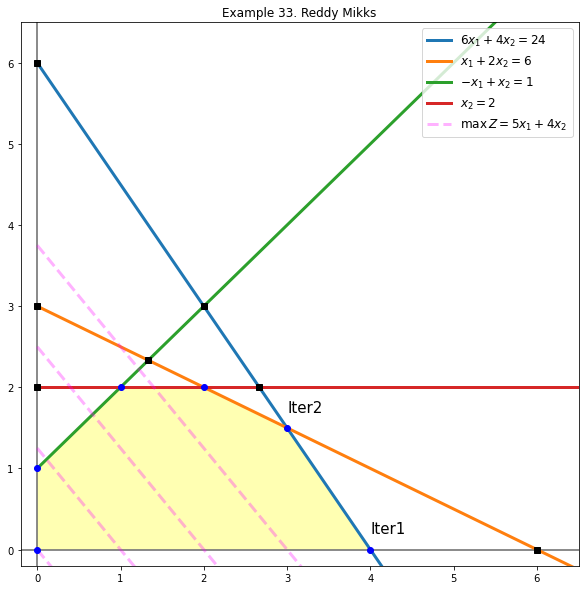

In [28]:
plt.figure(figsize=(10,10))
plt.axvline(0, color="0.4")
plt.axhline(0, color="0.4")

for eq, eqlabel in zip(equations_list, equations_label):
    plt.plot(*eq, lw=3, label=eqlabel)


plt.plot(x, zeq(x, 0), lw=3, ls="--", color="magenta", alpha=0.3, label=r"$\max\, Z = 5x_1 + 4x_2$")
for z in np.linspace(5, 15, 3):
    plt.plot(x, zeq(x, z), lw=3, ls="--", color="magenta", alpha=0.3)


for point in infeasibles[:, :2]:
    plt.plot(*point, ls="", marker="s", ms=6, color="k" )

for point in allpoints:
    plt.plot(*point, ls="", color="blue", marker="o", ms=6)

for i,point in enumerate(points):
    plt.annotate(f"Iter{i+1}", xy=point, xytext=(point[0] , point[1] + 0.2 ), fontsize=15)

plt.fill(*coordinates, facecolor="yellow", alpha=0.3)

plt.title("Example 33. Reddy Mikks")
plt.xlim(-0.2,6.5)
plt.ylim(-0.2, 6.5)
plt.legend(fontsize=12, loc="upper right")
plt.show()